In [1]:
import pandas as pd

# Load datasets
basket = pd.read_csv("data/basket_details.csv")
customers = pd.read_csv("data/customer_details.csv")

# Show first rows
basket.head(), customers.head()


(   customer_id  product_id basket_date  basket_count
 0     42366585    41475073  2019-06-19             2
 1     35956841    43279538  2019-06-19             2
 2     26139578    31715598  2019-06-19             3
 3      3262253    47880260  2019-06-19             2
 4     20056678    44747002  2019-06-19             2,
    customer_id   sex  customer_age  tenure
 0      9798859  Male          44.0      93
 1     11413563  Male          36.0      65
 2       818195  Male          35.0     129
 3     12049009  Male          33.0      58
 4     10083045  Male          42.0      88)

In [12]:
basket['basket_date'] = pd.to_datetime(basket['basket_date'])
basket['year']=basket['basket_date'].dt.year
basket['month']=basket['basket_date'].dt.month
def basket_size(count):
    if count <=2:
        return 'small'
    elif count <= 5:
        return 'medium'
    else:
        return 'large'
basket['Basket_size']=basket['basket_count'].apply(basket_size)    
basket.head()


,customer_id,product_id,basket_date,basket_count,year,month,Basket_size
7499,38059551,954452,2019-05-20,2,2019,5,small
1701,7052947,32997857,2019-05-20,2,2019,5,small
1703,33229333,44460326,2019-05-20,2,2019,5,small
10432,7383993,40930576,2019-05-20,2,2019,5,small
1704,36389302,41977515,2019-05-20,2,2019,5,small


In [ ]:
basket.shape
basket['basket_count'].describe()
basket['Basket_size'].value_counts()
basket['product_id'].value_counts().head(10)

product_id
43524799    32
31516269    25
39833031    24
46130148    17
40276011    12
3735903     12
42033035    11
39050110    11
6411072     10
35134963    10
Name: count, dtype: int64

In [18]:
daily_baskets=basket.groupby('basket_date').size()
daily_baskets.head()

basket_date
2019-05-20    518
2019-05-21    457
2019-05-22    276
2019-05-23    275
2019-05-24    611
dtype: int64

In [20]:
customer_activity = basket.groupby('customer_id').size().sort_values(ascending=False)
customer_activity.head()

customer_id
8276934     8
11082470    8
18617678    6
20098151    5
21700599    5
dtype: int64

In [23]:
basket['Basket_size'].value_counts()



Basket_size
small     13323
medium     1623
large        54
Name: count, dtype: int64

In [24]:
basket['product_id'].value_counts().head(5)


product_id
43524799    32
31516269    25
39833031    24
46130148    17
40276011    12
Name: count, dtype: int64

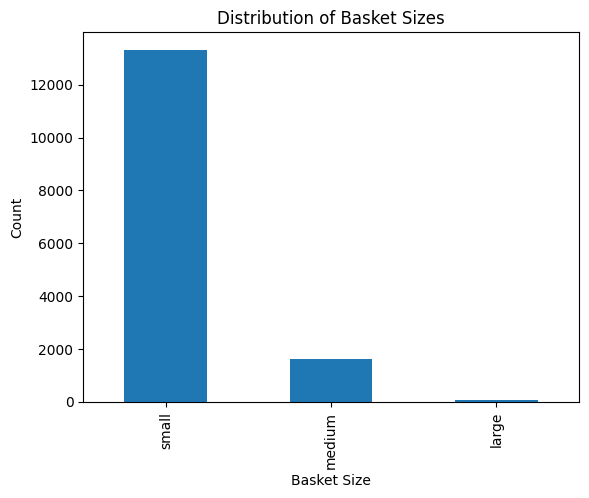

In [26]:
import matplotlib.pyplot as plt

basket['Basket_size'].value_counts().plot(kind='bar')
plt.title('Distribution of Basket Sizes')
plt.xlabel('Basket Size')
plt.ylabel('Count')
plt.show()


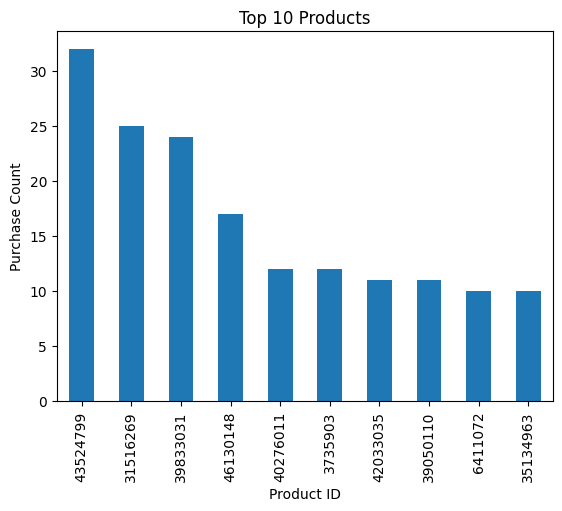

In [27]:
top_products = basket['product_id'].value_counts().head(10)

top_products.plot(kind='bar')
plt.title('Top 10 Products')
plt.xlabel('Product ID')
plt.ylabel('Purchase Count')
plt.show()


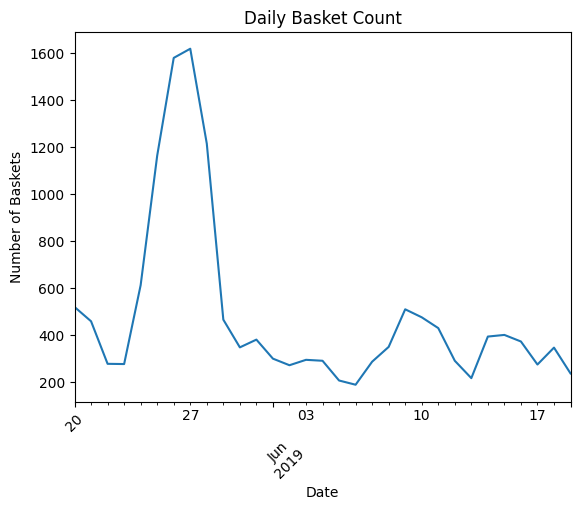

In [28]:
daily_baskets = basket.groupby('basket_date').size()

daily_baskets.plot()
plt.title('Daily Basket Count')
plt.xlabel('Date')
plt.ylabel('Number of Baskets')
plt.xticks(rotation=45)
plt.show()
